In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.svm import SVC
%matplotlib inline

In [2]:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means

## Reading the data

In [3]:
bank_dataset_path = "Bank_data.csv"

credit_score = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[1]).astype(float)

country = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[2], dtype = None, encoding=None)
country_france = np.where(country == 'France', 1, 0).astype(int)
country_spain = np.where(country == 'Spain', 1, 0).astype(int)
country_germany = np.where(country == 'Germany', 1, 0).astype(int)

gender = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[3], dtype = None, encoding=None)
gender_male = np.where(gender == 'Male', 1, 0).astype(int)
gender_female = np.where(gender == 'Female', 1, 0).astype(int)

age = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[4]).astype(float)

tenure = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[5]).astype(float)

balance = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[6]).astype(float)

products_number = np.genfromtxt(bank_dataset_path, delimiter=",",\
                                skip_header=1, usecols=[7], dtype = None, encoding=None).astype(int)

credit_card = np.genfromtxt(bank_dataset_path, delimiter=",",\
                            skip_header=1, usecols=[8], dtype = None, encoding=None).astype(int)

active_member = np.genfromtxt(bank_dataset_path, delimiter=",",\
                              skip_header=1, usecols=[9], dtype = None, encoding=None).astype(int)

estimated_salary = np.genfromtxt(bank_dataset_path, delimiter=",", skip_header=1, usecols=[10]).astype(float)

churn = np.genfromtxt(bank_dataset_path, delimiter=",",\
                      skip_header=1, usecols=[11], dtype = None, encoding=None).astype(int)

## Data Visualisation

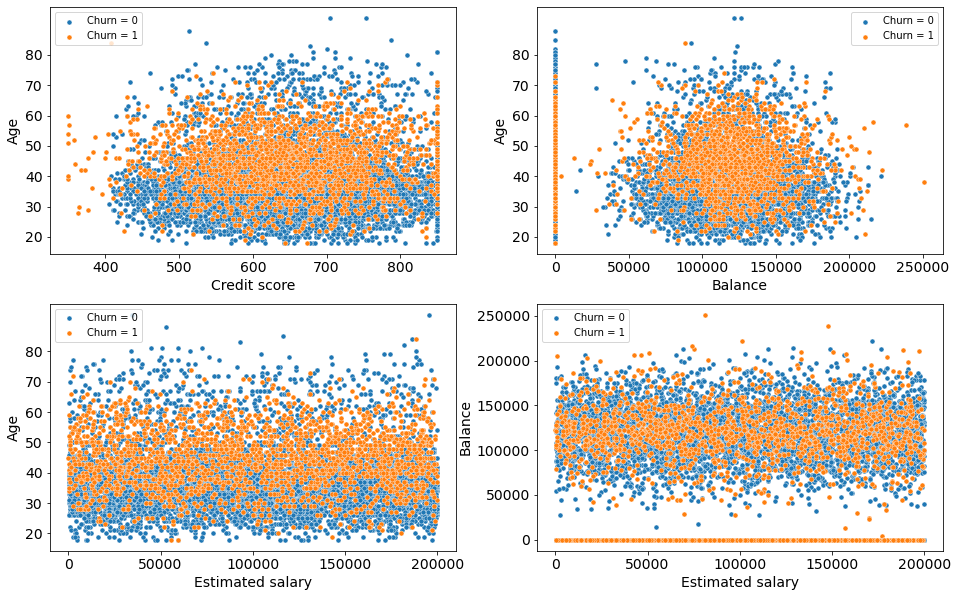

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

sns.scatterplot(x=credit_score[churn==0], y=age[churn==0],s=25,ax=axes[0,0],label="Churn = 0")
sns.scatterplot(x=credit_score[churn==1], y=age[churn==1],s=25,ax=axes[0,0],label="Churn = 1")
axes[0,0].set_xlabel("Credit score",fontsize=14)
axes[0,0].set_ylabel("Age",fontsize=14)
axes[0,0].tick_params(axis='x', labelsize=14)
axes[0,0].tick_params(axis='y', labelsize=14)
axes[0,0].legend(loc='upper left')
axes[0,0].set_yticks([20,30,40,50,60,70,80])

sns.scatterplot(x=balance[churn==0], y=age[churn==0],s=25,ax=axes[0,1],label="Churn = 0")
sns.scatterplot(x=balance[churn==1], y=age[churn==1],s=25,ax=axes[0,1],label="Churn = 1")
axes[0,1].set_xlabel("Balance",fontsize=14)
axes[0,1].set_ylabel("Age",fontsize=14)
axes[0,1].tick_params(axis='x', labelsize=14)
axes[0,1].tick_params(axis='y', labelsize=14)
axes[0,1].set_yticks([20,30,40,50,60,70,80])

sns.scatterplot(x=estimated_salary[churn==0], y=age[churn==0],s=25,ax=axes[1,0],label="Churn = 0")
sns.scatterplot(x=estimated_salary[churn==1], y=age[churn==1],s=25,ax=axes[1,0],label="Churn = 1")
axes[1,0].set_xlabel("Estimated salary",fontsize=14)
axes[1,0].set_ylabel("Age",fontsize=14)
axes[1,0].tick_params(axis='x', labelsize=14)
axes[1,0].tick_params(axis='y', labelsize=14)
axes[1,0].set_yticks([20,30,40,50,60,70,80])
axes[1,0].set_xticks([0,50000,100000,150000,200000])

sns.scatterplot(x=estimated_salary[churn==0], y=balance[churn==0],s=25,ax=axes[1,1],label="Churn = 0")
sns.scatterplot(x=estimated_salary[churn==1], y=balance[churn==1],s=25,ax=axes[1,1],label="Churn = 1")
axes[1,1].set_xlabel("Estimated salary",fontsize=14)
axes[1,1].set_ylabel("Balance",fontsize=14)
axes[1,1].tick_params(axis='x', labelsize=14)
axes[1,1].tick_params(axis='y', labelsize=14)
axes[1,1].set_xticks([0,50000,100000,150000,200000])

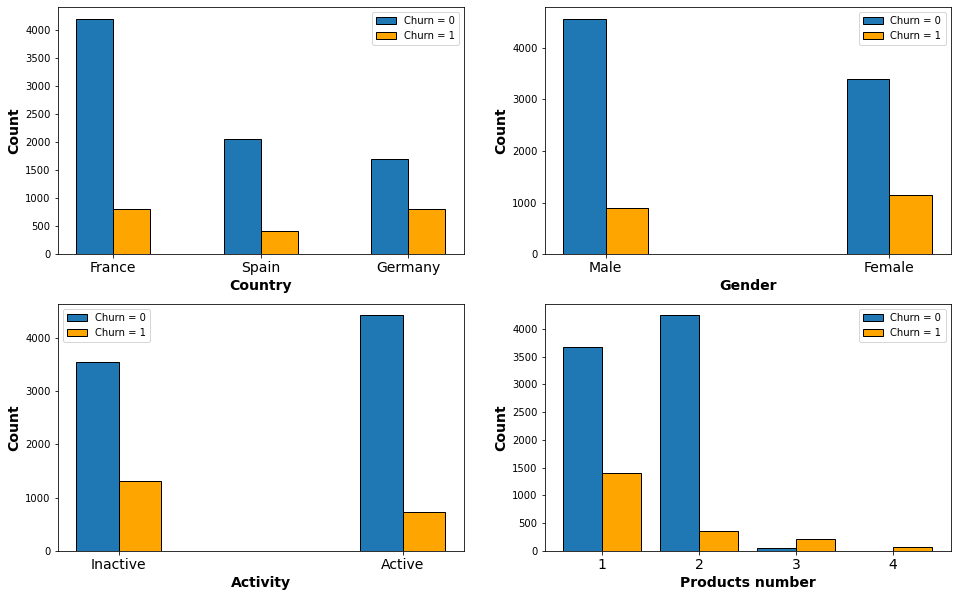

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

churn_0_counts_countries = [np.sum(country_france & (churn == 0)),
                  np.sum(country_spain & (churn == 0)),
                  np.sum(country_germany & (churn == 0))]

churn_1_counts_countries = [np.sum(country_france & (churn == 1)),
                  np.sum(country_spain & (churn == 1)),
                  np.sum(country_germany & (churn == 1))]

countries = ["France", "Spain", "Germany"]
bar_width = 0.25
index_countries = np.arange(len(countries))

axes[0,0].bar(index_countries, churn_0_counts_countries, width=bar_width, label="Churn = 0", edgecolor="black")
axes[0,0].bar(index_countries + bar_width, churn_1_counts_countries, width=bar_width,\
              label="Churn = 1",color="orange",edgecolor="black")

axes[0,0].set_xlabel("Country", fontsize=14, fontweight="bold")
axes[0,0].set_ylabel("Count", fontsize=14, fontweight="bold")
axes[0,0].set_xticks(index_countries + bar_width / 2)
axes[0,0].set_xticklabels(countries,fontsize=14)
axes[0,0].legend()

churn_0_counts_genders = [np.sum(gender_male & (churn == 0)),
                  np.sum(gender_female & (churn == 0))]

churn_1_counts_genders = [np.sum(gender_male & (churn == 1)),
                  np.sum(gender_female & (churn == 1))]

genders = ["Male", "Female"]
bar_width = 0.15
index_genders = np.arange(len(genders))


axes[0,1].bar(index_genders, churn_0_counts_genders, width=bar_width, label="Churn = 0", edgecolor="black")
axes[0,1].bar(index_genders + bar_width, churn_1_counts_genders, width=bar_width,\
              label="Churn = 1",color="orange", edgecolor="black")

axes[0,1].set_xlabel("Gender",fontsize=14, fontweight="bold")
axes[0,1].set_ylabel("Count",fontsize=14, fontweight="bold")
axes[0,1].set_xticks(index_genders + bar_width / 2)
axes[0,1].set_xticklabels(genders,fontsize=14)
axes[0,1].legend()


inactive=[active_member==0]
active=[active_member==1]

churn_0_counts_activity = [np.sum(inactive & (churn == 0)),
                  np.sum(active & (churn == 0))]

churn_1_counts_activity = [np.sum(inactive & (churn == 1)),
                  np.sum(active & (churn == 1))]

activity = ["Inactive", "Active"]
bar_width = 0.15
index_activity = np.arange(len(activity))


axes[1,0].bar(index_activity, churn_0_counts_activity, width=bar_width, label="Churn = 0", edgecolor="black")
axes[1,0].bar(index_activity + bar_width, churn_1_counts_activity, width=bar_width,\
              label="Churn = 1",color="orange", edgecolor="black")

axes[1,0].set_xlabel("Activity",fontsize=14, fontweight="bold")
axes[1,0].set_ylabel("Count",fontsize=14, fontweight="bold")
axes[1,0].set_xticks(index_activity + bar_width / 2)
axes[1,0].set_xticklabels(activity,fontsize=14)
axes[1,0].legend()

one_product=[products_number==1]
two_product=[products_number==2]
three_product=[products_number==3]
four_product=[products_number==4]

churn_0_counts_products = [np.sum(one_product & (churn == 0)),
                  np.sum(two_product & (churn == 0)),np.sum(three_product & (churn == 0)),\
                          np.sum(four_product & (churn == 0))]

churn_1_counts_products = [np.sum(one_product & (churn == 1)),
                  np.sum(two_product & (churn == 1)),np.sum(three_product & (churn == 1)),\
                          np.sum(four_product & (churn == 1))]

products = ["1", "2", "3", "4"]
bar_width = 0.4
index_products = np.arange(len(products))


axes[1,1].bar(index_products, churn_0_counts_products, width=bar_width, label="Churn = 0", edgecolor="black")
axes[1,1].bar(index_products + bar_width, churn_1_counts_products, width=bar_width,\
              label="Churn = 1",color="orange", edgecolor="black")

axes[1,1].set_xlabel("Products number",fontsize=14, fontweight="bold")
axes[1,1].set_ylabel("Count",fontsize=14, fontweight="bold")
axes[1,1].set_xticks(index_products + bar_width / 2)
axes[1,1].set_xticklabels(products,fontsize=14)
axes[1,1].legend()

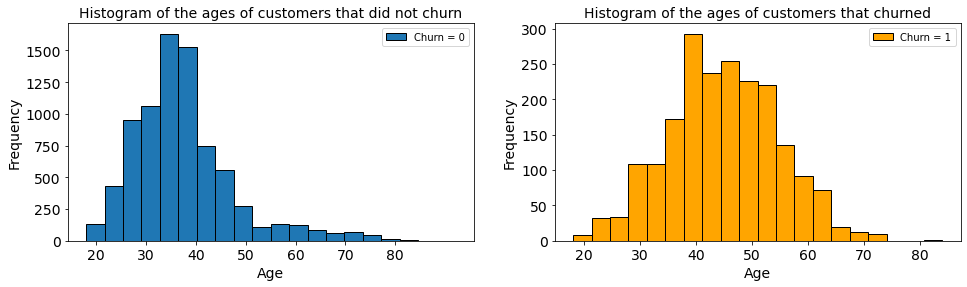

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

axes[0].hist(age[churn==0],label="Churn = 0",bins=20, edgecolor="black")
axes[0].legend()
axes[0].set_xlabel("Age",fontsize=14)
axes[0].set_ylabel("Frequency",fontsize=14)
axes[0].set_title("Histogram of the ages of customers that did not churn", fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_xticks([20,30,40,50,60,70,80])

axes[1].hist(age[churn==1],label="Churn = 1", color = "orange",bins=20, edgecolor="black")
axes[1].legend()
axes[1].set_xlabel("Age",fontsize=14)
axes[1].set_ylabel("Frequency",fontsize=14)
axes[1].set_title("Histogram of the ages of customers that churned", fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_xticks([20,30,40,50,60,70,80])

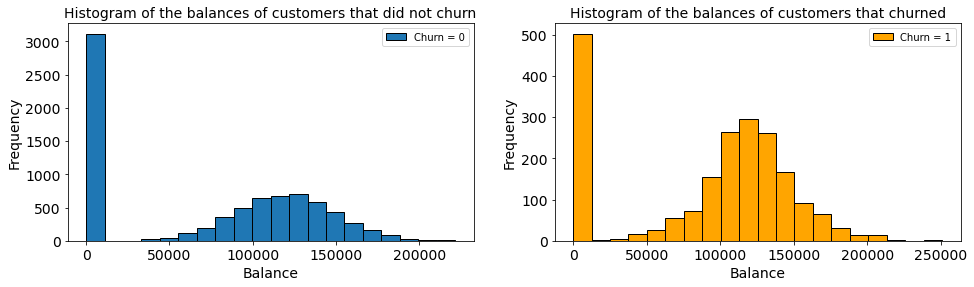

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

axes[0].hist(balance[churn==0],label="Churn = 0",bins=20, edgecolor="black")
axes[0].legend()
axes[0].set_xlabel("Balance",fontsize=14)
axes[0].set_ylabel("Frequency",fontsize=14)
axes[0].set_title("Histogram of the balances of customers that did not churn", fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

axes[1].hist(balance[churn==1],label="Churn = 1", color = "orange",bins=20, edgecolor="black")
axes[1].legend()
axes[1].set_xlabel("Balance",fontsize=14)
axes[1].set_ylabel("Frequency",fontsize=14)
axes[1].set_title("Histogram of the balances of customers that churned", fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

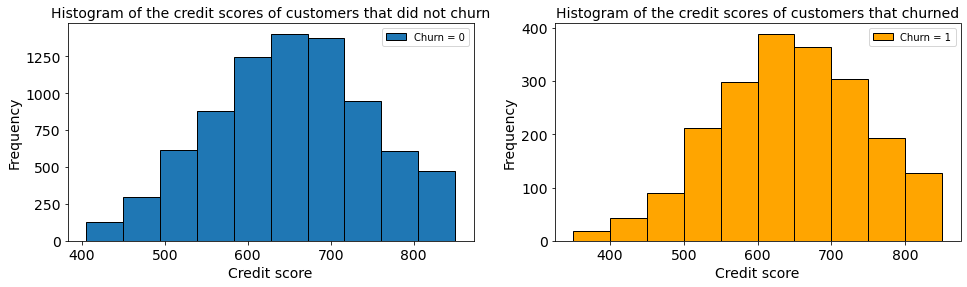

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

axes[0].hist(credit_score[churn==0],label="Churn = 0", edgecolor="black")
axes[0].legend()
axes[0].set_xlabel("Credit score",fontsize=14)
axes[0].set_ylabel("Frequency",fontsize=14)
axes[0].set_title("Histogram of the credit scores of customers that did not churn", fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

axes[1].hist(credit_score[churn==1],label="Churn = 1", color = "orange", edgecolor="black")
axes[1].legend()
axes[1].set_xlabel("Credit score",fontsize=14)
axes[1].set_ylabel("Frequency",fontsize=14)
axes[1].set_title("Histogram of the credit scores of customers that churned", fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

## Logistic regression

The function **<font color='red'>linear_regression_data</font>** creates a data matrix for the input data. The function **<font color='red'>linear_model</font>** multiplies the data matrix by the features' weights.

In [127]:
def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1)) # first column of the matrix consists of 1s
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

In [128]:
def linear_model(data_matrix, weights):
    return data_matrix @ weights

The output of **<font color='red'>logistic_function</font>** is the probability that the data input has a label 1.

In [129]:
def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))

The following function returns **True** if the probability output of the logistic function is greater than 0.5 and **False** otherwise.

In [130]:
def binary_prediction_function(data_matrix, weights):
    probability = logistic_function(linear_model(data_matrix, weights))
    return probability > 1/2

The following gradient descent function returns the weights minimise the cost function. It will be applied to the cost function of binary logistic regression later.

In [131]:
def gradient_descent(alpha, objective, gradient, initial_weights, step_size=1, no_of_iterations=100, print_output=10):
    
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights, alpha))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights, alpha)
        objective_values.append(objective(weights, alpha))

    #print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1, m=no_of_iterations,\
     #                                                                  o=objective_values[counter]))
    return weights, objective_values

In [132]:
def binary_logistic_regression_cost_function(data_matrix, data_labels, weights, alpha=0):
    regression_outputs = linear_model(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) - data_labels *\
                   regression_outputs)+(alpha/2)*(np.linalg.norm(weights))**2

In [133]:
def binary_logistic_regression_gradient(data_matrix, data_labels, weights, alpha=0):
    return data_matrix.T @ (logistic_function(linear_model(data_matrix, weights))\
                            - data_labels) / len(data_matrix)+alpha*weights

The following function returns the proportion of the estimated labels that match the true labels.

In [134]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels
    return np.mean(equal_labels)

The following function splits the data randomly into **K** even folds.

In [135]:
def k_fold_split(data_size, K):
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] for i in range(K)]
    return indexes_split

The following function utilises the function **<font color='red'>k_fold_split</font>** to randomly split the data into **K** folds and uses 1 fold as the testing set and the remaining folds as the training set. Binary logistic regression is applied to the training set to estimate the data labels, and then they are compared to the true labels of the testing set to evaluate the performance of the algorithm.

In [136]:
def k_fold_cross_validation_logistic_regression(data_matrix, data_outputs, K, alpha):

    data_size = len(data_matrix)
    indexes_split = k_fold_split(data_size, K)
    
    for i in range(K):

        indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)]) # indexes of the training folds
      
        cost_function = lambda weights, alpha:\
        binary_logistic_regression_cost_function(data_matrix[indexes], data_outputs[indexes], weights, alpha)

        gradient_function = lambda weights, alpha:\
        binary_logistic_regression_gradient(data_matrix[indexes], data_outputs[indexes], weights, alpha)

        initial_weights = np.zeros((len(data_matrix[indexes].T), 1))

        step_size = 3.9 * len(data_matrix[indexes]) / (np.linalg.norm(data_matrix[indexes]))**2

        training_set_optimal_weights, objective_values = gradient_descent(alpha, cost_function, gradient_function,\
                                                               initial_weights, step_size, 800, 200)

        estimated_labels = binary_prediction_function(data_matrix[indexes_split[i]], training_set_optimal_weights)
        # the optimal weights are tested on the testing set

        accuracy_rate = classification_accuracy(estimated_labels, data_outputs[indexes_split[i]])
        # the estimated labels are compared with the true labels of the testing set
        
        if (i == 0):
            optimal_weights = training_set_optimal_weights / K
            accuracy = accuracy_rate / K
        else:
            optimal_weights += training_set_optimal_weights / K
            accuracy += accuracy_rate / K
            
    return optimal_weights, accuracy

This grid function takes an input objective function and returns its maximum value.

In [137]:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmax(values)]

### **First case**

Feature selection:

In [138]:
# all features are selected for the first case

bank_input = np.c_[credit_score, country_france, country_spain, country_germany, gender_male, gender_female, age,\
                   tenure, balance, products_number, credit_card, active_member, estimated_salary]

bank_labels = churn.reshape(-1, 1) # convert the churn array into a column vector

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

bank_data_matrix = linear_regression_data(bank_input)

Model execution:

In [139]:
K = 5
alpha_grid = np.append(np.array([i * 0.1 for i in range(10)]), np.array([i for i in range(1, 6)]))

accuracy = lambda alpha: k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, 5, alpha)[1]

optimal_alpha = grid_search(accuracy, alpha_grid)

print("The optimal alpha is ", optimal_alpha)

optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix,\
                                                                                      bank_labels, K, optimal_alpha)

print("\n The optimal weights for the optimal alpha are: \n w = {w}.T".format(w=optimal_weights.T))
print("\n The classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))

The optimal alpha is  0.0

 The optimal weights for the optimal alpha are: 
 w = [[-1.65381684 -0.0644512  -0.12184061 -0.09012904  0.23026416 -0.13159285
   0.13159285  0.76260134 -0.04614606  0.16429868 -0.0590448  -0.02031615
  -0.53760619  0.02774556]].T

 The classification accuracy of the model is 81.04%


Here the data inputs for which **products_number** is greater than 2 and **credit_score** is less than 400 are removed

In [140]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

bank_input = np.c_[credit_score[selected_indexes], country_france[selected_indexes], country_spain[selected_indexes],\
                   country_germany[selected_indexes], gender_male[selected_indexes], gender_female[selected_indexes],\
                   age[selected_indexes], tenure[selected_indexes], balance[selected_indexes],\
                   products_number[selected_indexes], credit_card[selected_indexes], active_member[selected_indexes],\
                   estimated_salary[selected_indexes]]

bank_labels = churn[selected_indexes].reshape(-1, 1)

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

bank_data_matrix = linear_regression_data(bank_input)

In [141]:
K = 5
alpha_grid = np.append(np.array([i * 0.1 for i in range(10)]), np.array([i for i in range(1, 6)]))

accuracy = lambda alpha: k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, 5, alpha)[1]

optimal_alpha = grid_search(accuracy, alpha_grid)

print("The optimal alpha is ", optimal_alpha)

optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix,\
                                                                                      bank_labels, K, optimal_alpha)

print("\n The optimal weights for the optimal alpha are: \n w = {w}.T".format(w=optimal_weights.T))
print("\n The classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))

The optimal alpha is  0.0

 The optimal weights for the optimal alpha are: 
 w = [[-1.99840575 -0.03561959 -0.15267299 -0.11135993  0.28862981 -0.13031758
   0.13031758  0.74358283 -0.05500763 -0.07774889 -0.77873466 -0.0294371
  -0.55701956  0.01454442]].T

 The classification accuracy of the model is 84.10638562497252%


We see an increase in the accuracy and the absolute value of the products_number weight

### Second case

Selected features: country_germany, gender_male, age, products_number, active_member

In [142]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

bank_input = np.c_[country_germany[selected_indexes], gender_male[selected_indexes],
                   age[selected_indexes], products_number[selected_indexes], active_member[selected_indexes]]

bank_labels = churn[selected_indexes].reshape(-1, 1)

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

bank_data_matrix = linear_regression_data(bank_input)

In [143]:
K = 5
alpha_grid = np.append(np.array([i * 0.1 for i in range(10)]), np.array([i for i in range(1, 2)]))

accuracy = lambda alpha: k_fold_cross_validation_logistic_regression(bank_data_matrix, bank_labels, 5, alpha)[1]

optimal_alpha = grid_search(accuracy, alpha_grid)

print("The optimal alpha is ", optimal_alpha)

optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix,\
                                                                                      bank_labels, K, optimal_alpha)

print("\n The optimal weights for the optimal alpha are: \n w = {w}.T".format(w=optimal_weights.T))
print("\n The classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))

The optimal alpha is  0.0

 The optimal weights for the optimal alpha are: 
 w = [[-1.99745528  0.38690436 -0.26263731  0.74495737 -0.75544461 -0.55525265]].T

 The classification accuracy of the model is 84.00297317494984%


### Third case

Selected features: age, products_number, active_member

In [144]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

bank_input = np.c_[age[selected_indexes], products_number[selected_indexes],\
                   active_member[selected_indexes]]

bank_labels = churn[selected_indexes].reshape(-1, 1)

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

bank_data_matrix = linear_regression_data(bank_input)

In [145]:
K = 5

optimal_weights, maximum_accuracy = k_fold_cross_validation_logistic_regression(bank_data_matrix,\
                                                                                      bank_labels, K, 0)

print("\n The optimal weights for alpha = 0 are: \n w = {w}.T".format(w=optimal_weights.T))
print("\n The classification accuracy of the model is {p}%".format(p = 100 * maximum_accuracy))


 The optimal weights for alpha = 0 are: 
 w = [[-1.92835429  0.7433654  -0.75074398 -0.55992459]].T

 The classification accuracy of the model is 83.6406436124987%


## K-nearest neighbours

The following function computes the Euclidean distance between each row-vector in the first array and all row-vectors in the second array.

In [60]:
def pairwise_distances(from_data, to_data):
    distance=np.zeros((len(from_data),len(to_data)),float)
    counter_1=0
    for vector_x in from_data:
        first_vector=vector_x
        counter_2=0
        for vector_y in to_data:
            second_vector=vector_y
            distance[counter_1,counter_2]=np.sqrt(np.sum((vector_x-vector_y)**2))
            counter_2+=1
        counter_1+=1 
    return distance

The following function takes in a training set and a testing set, and then performs the K-Nearest Neighbours algorithm to estimate the data labels.

In [61]:
def nearest_neighbour_classification(testing_inputs, training_inputs, training_outputs, no_of_neighbours):
    
    distances = pairwise_distances(testing_inputs, training_inputs)
    
    no_of_classes = 2
    sorted_indices = np.argsort(distances, axis=1)
    
    no_of_inputs = len(testing_inputs)
    no_of_points = len(training_inputs)
    
    new_array_to_sort = np.broadcast_to(training_outputs, (no_of_inputs, no_of_points))
    sorted_labels = np.take_along_axis(new_array_to_sort, sorted_indices, 1)
    
    predicted_labels=np.zeros(no_of_inputs, int)
    
    for id_input in range(no_of_inputs):
        
        probability_labels=np.zeros(int(no_of_classes), float)
        
        for id_neighbor in range(0,no_of_neighbours):
            
            probability_labels[sorted_labels[id_input][id_neighbor]]+=1./no_of_neighbours

        predicted_labels[id_input]=np.argmax(probability_labels)
    
    return predicted_labels

In [62]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels
    return np.mean(equal_labels)

In [63]:
def k_fold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] for i in range(K)]
    return indexes_split

In [64]:
def k_fold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation,\
                                misclassification_evaluation, no_of_neighbours):
    
    data_size = len(data_inputs)
    indexes_split = k_fold_split(data_size, K)

    average_accuracy = 0
    
    for i in range(K):
        
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        
        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],\
                                             data_inputs[training_indexes], data_outputs[training_indexes],\
                                             no_of_neighbours)
        
        accuracy = misclassification_evaluation(predicted_labels, data_outputs[indexes_split[i]])
        average_accuracy += accuracy / K
        
    error = 1.-average_accuracy
    return error

In [65]:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]

### First case

Selected features: age

In [79]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

indexes_of_ordered = np.argsort(age[selected_indexes])[::5]

bank_input = np.c_[age[selected_indexes][indexes_of_ordered]]

bank_output = churn[selected_indexes][indexes_of_ordered]

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

In [80]:
K = 5
data_size = len(bank_input)
no_of_neighbours_list = list(range(1,26,1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours:\
nearest_neighbour_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours)

misclassification_evaluation = lambda predicted_labels, true_labels:\
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbours:\
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbours)

optimal_no_of_neighbours = grid_search(K_objective_function, no_of_neighbours_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("The optimal number of neighbours is {n}.\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbours, e = 100 * optimal_classification_error))

The optimal number of neighbours is 19.
The classification error is 16.92%


### Second case

Selected features: age, products_number

In [81]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

indexes_of_ordered = np.argsort(age[selected_indexes])[::5]

bank_input = np.c_[age[selected_indexes][indexes_of_ordered], products_number[selected_indexes][indexes_of_ordered]]

bank_output = churn[selected_indexes][indexes_of_ordered]

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

In [82]:
K = 5
data_size = len(bank_input)
no_of_neighbours_list = list(range(1,26,1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours:\
nearest_neighbour_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours)

misclassification_evaluation = lambda predicted_labels, true_labels:\
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbours:\
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbours)

optimal_no_of_neighbours = grid_search(K_objective_function, no_of_neighbours_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("The optimal number of neighbours is {n}.\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbours, e = 100 * optimal_classification_error))

The optimal number of neighbours is 20.
The classification error is 14.91%


### Third case

Selected features: age, products_number, active_member

In [84]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

indexes_of_ordered = np.argsort(age[selected_indexes])[::5]

bank_input = np.c_[age[selected_indexes][indexes_of_ordered], products_number[selected_indexes][indexes_of_ordered],\
                  active_member[selected_indexes][indexes_of_ordered]]

bank_output = churn[selected_indexes][indexes_of_ordered]

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

In [85]:
K = 5
data_size = len(bank_input)
no_of_neighbours_list = list(range(1,26,1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours:\
nearest_neighbour_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours)

misclassification_evaluation = lambda predicted_labels, true_labels:\
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbours:\
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbours)

optimal_no_of_neighbours = grid_search(K_objective_function, no_of_neighbours_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("The optimal number of neighbours is {n}.\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbours, e = 100 * optimal_classification_error))

The optimal number of neighbours is 9.
The classification error is 13.35%


### Fourth case

Selected features: estimated_salary

In [86]:
selected_indexes = np.where((products_number < 3) & (credit_score > 400))

indexes_of_ordered = np.argsort(estimated_salary[selected_indexes])[::5]

bank_input = np.c_[estimated_salary[selected_indexes][indexes_of_ordered]]

bank_output = churn[selected_indexes][indexes_of_ordered]

bank_input, bank_row_of_means, bank_row_of_stds = standardise(bank_input)

In [87]:
K = 5
data_size = len(bank_input)
no_of_neighbours_list = list(range(1,26,1))

evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours:\
nearest_neighbour_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours)

misclassification_evaluation = lambda predicted_labels, true_labels:\
classification_accuracy(predicted_labels, true_labels)

K_objective_function = lambda no_of_neighbours:\
k_fold_cross_validation_knn(bank_input, bank_output, K, evaluation, misclassification_evaluation, no_of_neighbours)

optimal_no_of_neighbours = grid_search(K_objective_function, no_of_neighbours_list)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

print("The optimal number of neighbours is {n}.\
\nThe classification error is {e:2.2f}%".format(n = optimal_no_of_neighbours, e = 100 * optimal_classification_error))

The optimal number of neighbours is 18.
The classification error is 19.10%


## Support Vector Machine

In [176]:
def k_fold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)] for i in range(K)]
    return indexes_split

In [177]:
def k_fold_cross_validation_svm(data_matrix, data_outputs, K, regularisation_parameter):

    data_size = len(data_matrix)
    indexes_split = k_fold_split(data_size, K)
    svm_classifier = SVC(C=regularisation_parameter)
    
    for i in range(K):

        indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
      
        svm_classifier.fit(data_matrix[indexes], data_outputs[indexes]) # fit the model on the training data
        
        estimated_labels = svm_classifier.predict(data_matrix[indexes_split[i]]) # use the model on the testing data
        
        accuracy = classification_accuracy(estimated_labels, data_outputs[indexes_split[i]])
        # compare the estimated labels with the true labels
        
        if (i == 0):
            average_accuracy = accuracy / K
        else:
            average_accuracy += accuracy / K
            
    return average_accuracy

In [164]:
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmax(values)]

### First case

All features selected

In [92]:
bank_input = np.c_[credit_score, country_france, country_spain, country_germany, gender_male, gender_female, age,\
                   tenure, balance, products_number, credit_card, active_member, estimated_salary]

bank_input = standardise(bank_input)[0]
bank_labels = churn

In [93]:
K=5
regularisation_parameter_grid = np.array([i * 0.5 for i in range(1,21)])

accuracy = lambda regularisation_parameter: k_fold_cross_validation_svm(bank_input, bank_labels,\
                                                                        K, regularisation_parameter)
optimal_regularisation_parameter = grid_search(accuracy, regularisation_parameter_grid)

print("The optimal regularisation parameter is ", optimal_regularisation_parameter)

maximum_accuracy = k_fold_cross_validation_svm(bank_input, bank_labels, K, optimal_regularisation_parameter)

print("\nThe classification accuracy of the model with the optimal regularisation parameter is {p}%"\
      .format(p = 100 * maximum_accuracy))

The optimal regularisation parameter is  4.0

The classification accuracy of the model with the optimal regularisation parameter is 85.52%


### Second case

Selected features: country_germany, gender_male, age, products_number, active_member

In [167]:
bank_input = np.c_[country_germany, gender_male, age,\
                   products_number, active_member]

bank_input = standardise(bank_input)[0]
bank_labels = churn

In [156]:
K=5
regularisation_parameter_grid = np.array([i * 0.5 for i in range(1,21)])

accuracy = lambda regularisation_parameter: k_fold_cross_validation_svm(bank_input, bank_labels,\
                                                                        K, regularisation_parameter)
optimal_regularisation_parameter = grid_search(accuracy, regularisation_parameter_grid)

print("The optimal regularisation parameter is ", optimal_regularisation_parameter)

maximum_accuracy = k_fold_cross_validation_svm(bank_input, bank_labels, K, optimal_regularisation_parameter)

print("\nThe classification accuracy of the model with the optimal regularisation parameter is {p}%"\
      .format(p = 100 * maximum_accuracy))

The optimal regularisation parameter is  8.5

The classification accuracy of the model with the optimal regularisation parameter is 85.88%
